####Supp figure plots

Mainly QC:

1. Normal QC plots
2. Outlier highlight
3. Replicates
4. time points

env: Run under scanpy_seu5

In [9]:
#load packages
suppressMessages({
    library(dplyr)
    library(tidyverse)

    #library(networkD3)
    library(ggplot2)
    library(ggrepel)
    #library(pheatmap)
    #library(grid)
    library(RColorBrewer)
    library(viridis)
    library(cowplot)
    library(hrbrthemes)
    library(GGally)
    library(plotly)
    library(circlize)
    #library(scCustomize)
    library(patchwork)
    
    library(Seurat)
    library(scales)
    #library(reshape2)
    library(stringr)
    #library(magrittr)
})

pdim<-function(x,y){
    return(options(repr.plot.width=x, repr.plot.height=y))
}

In [10]:
outdir<-".../Analysis_script//Output//Rev_plots//Supp_QC_plots/"

In [11]:
obj_ori<-readRDS(".../objects/2024Dec_Emilia_BCtracing_merged_clustered.rds")

obj_clean<-readRDS(".../objects/2024Dec_Emilia_BCtracing_merged_clustered_FinalCleaned.rds")

In [12]:
obj_ori[["percent.mt"]]<-PercentageFeatureSet(obj_ori, pattern = "^MT-")


In [13]:
obj_ori@meta.data$Barcode<-factor(obj_ori@meta.data$Barcode,
                                 levels = c("Pos","Neg"))

png 
  2

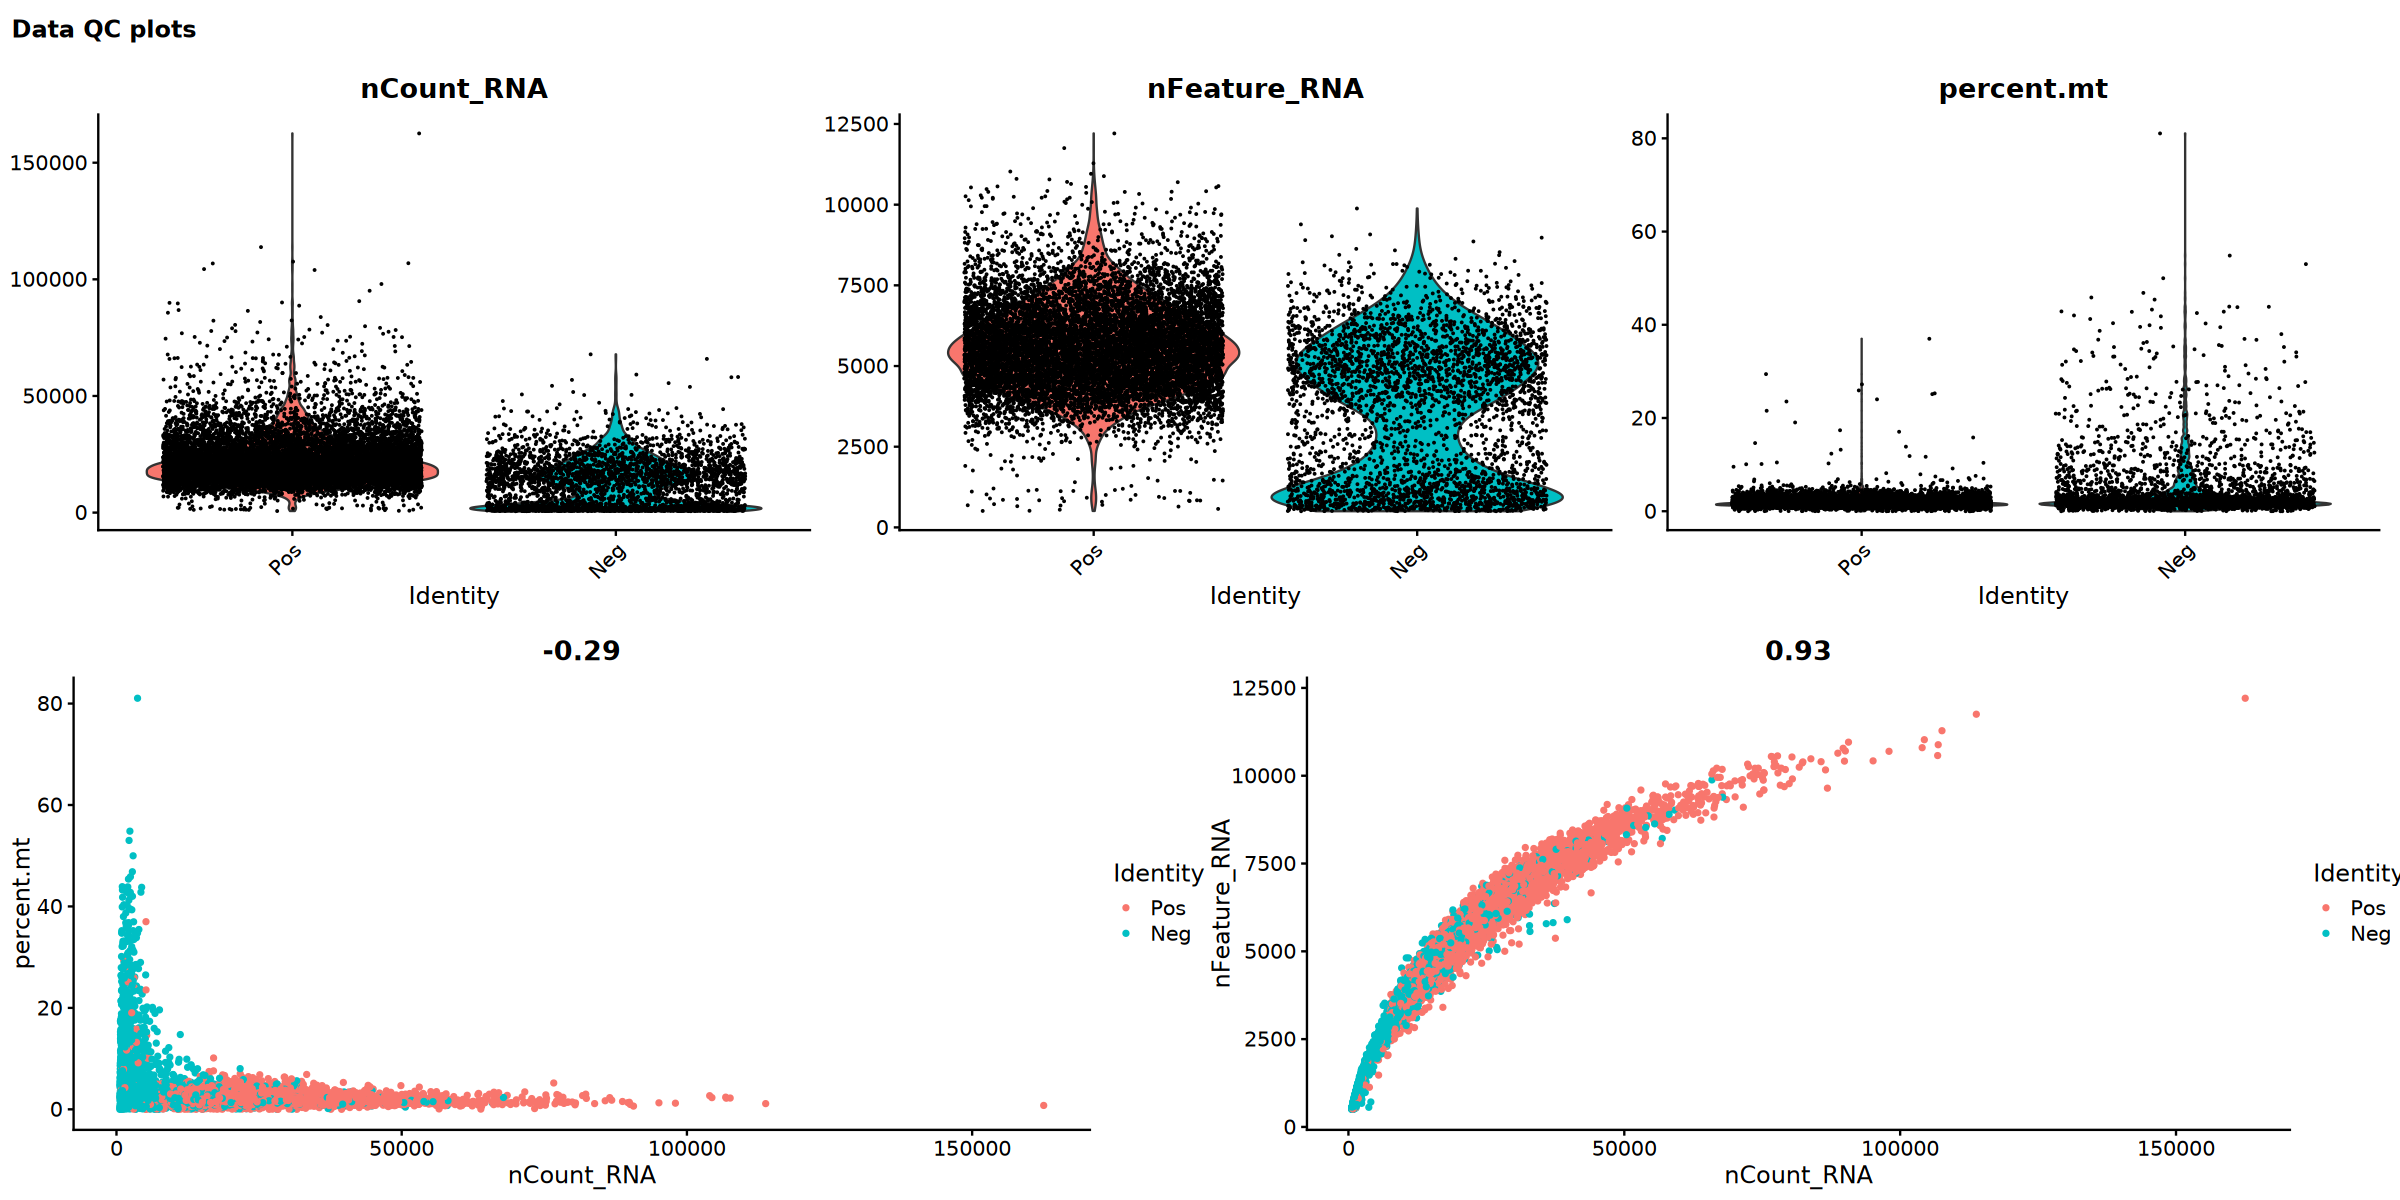

In [33]:
    options(repr.plot.width=20, repr.plot.height=10)


    plot_title<-ggdraw() + draw_label(
    paste0("Data QC plots"),
    fontface = 'bold', font = 12, x = 0,hjust = 0) +
  theme(
    # add margin on the left of the drawing canvas,
    # so title is aligned with left edge of first plot
    plot.margin = margin(0, 0, 0, 7)
  )
    
    vln_plot<-VlnPlot(obj_ori, features = c("nCount_RNA", 
                                                  "nFeature_RNA", 
                                                  "percent.mt"), 
                      group.by = "Barcode",
                      ncol = 3)
    
    scatter_1<-FeatureScatter(obj_ori, feature1 = "nCount_RNA", 
                              feature2 = "percent.mt",
                             group.by = "Barcode")
    scatter_2<-FeatureScatter(obj_ori, feature1 = "nCount_RNA", 
                              feature2 = "nFeature_RNA",
                             group.by = "Barcode")
    bottom_row<-plot_grid(scatter_1, scatter_2)

print(plot_grid(plot_title, vln_plot, bottom_row,
                    ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1, 1)))

    svg(paste0(outdir, "2025_Emilia_EscTREX_revision_SuppFigure_DataQC_general_BCsep.svg"), 
        width = 20, height = 10)
    print(plot_grid(plot_title, vln_plot, bottom_row,
                    ncol = 1,
  # rel_heights values control vertical title margins
  rel_heights = c(0.1, 1, 1)))

    #print('meow meow says the cat')
    dev.off()

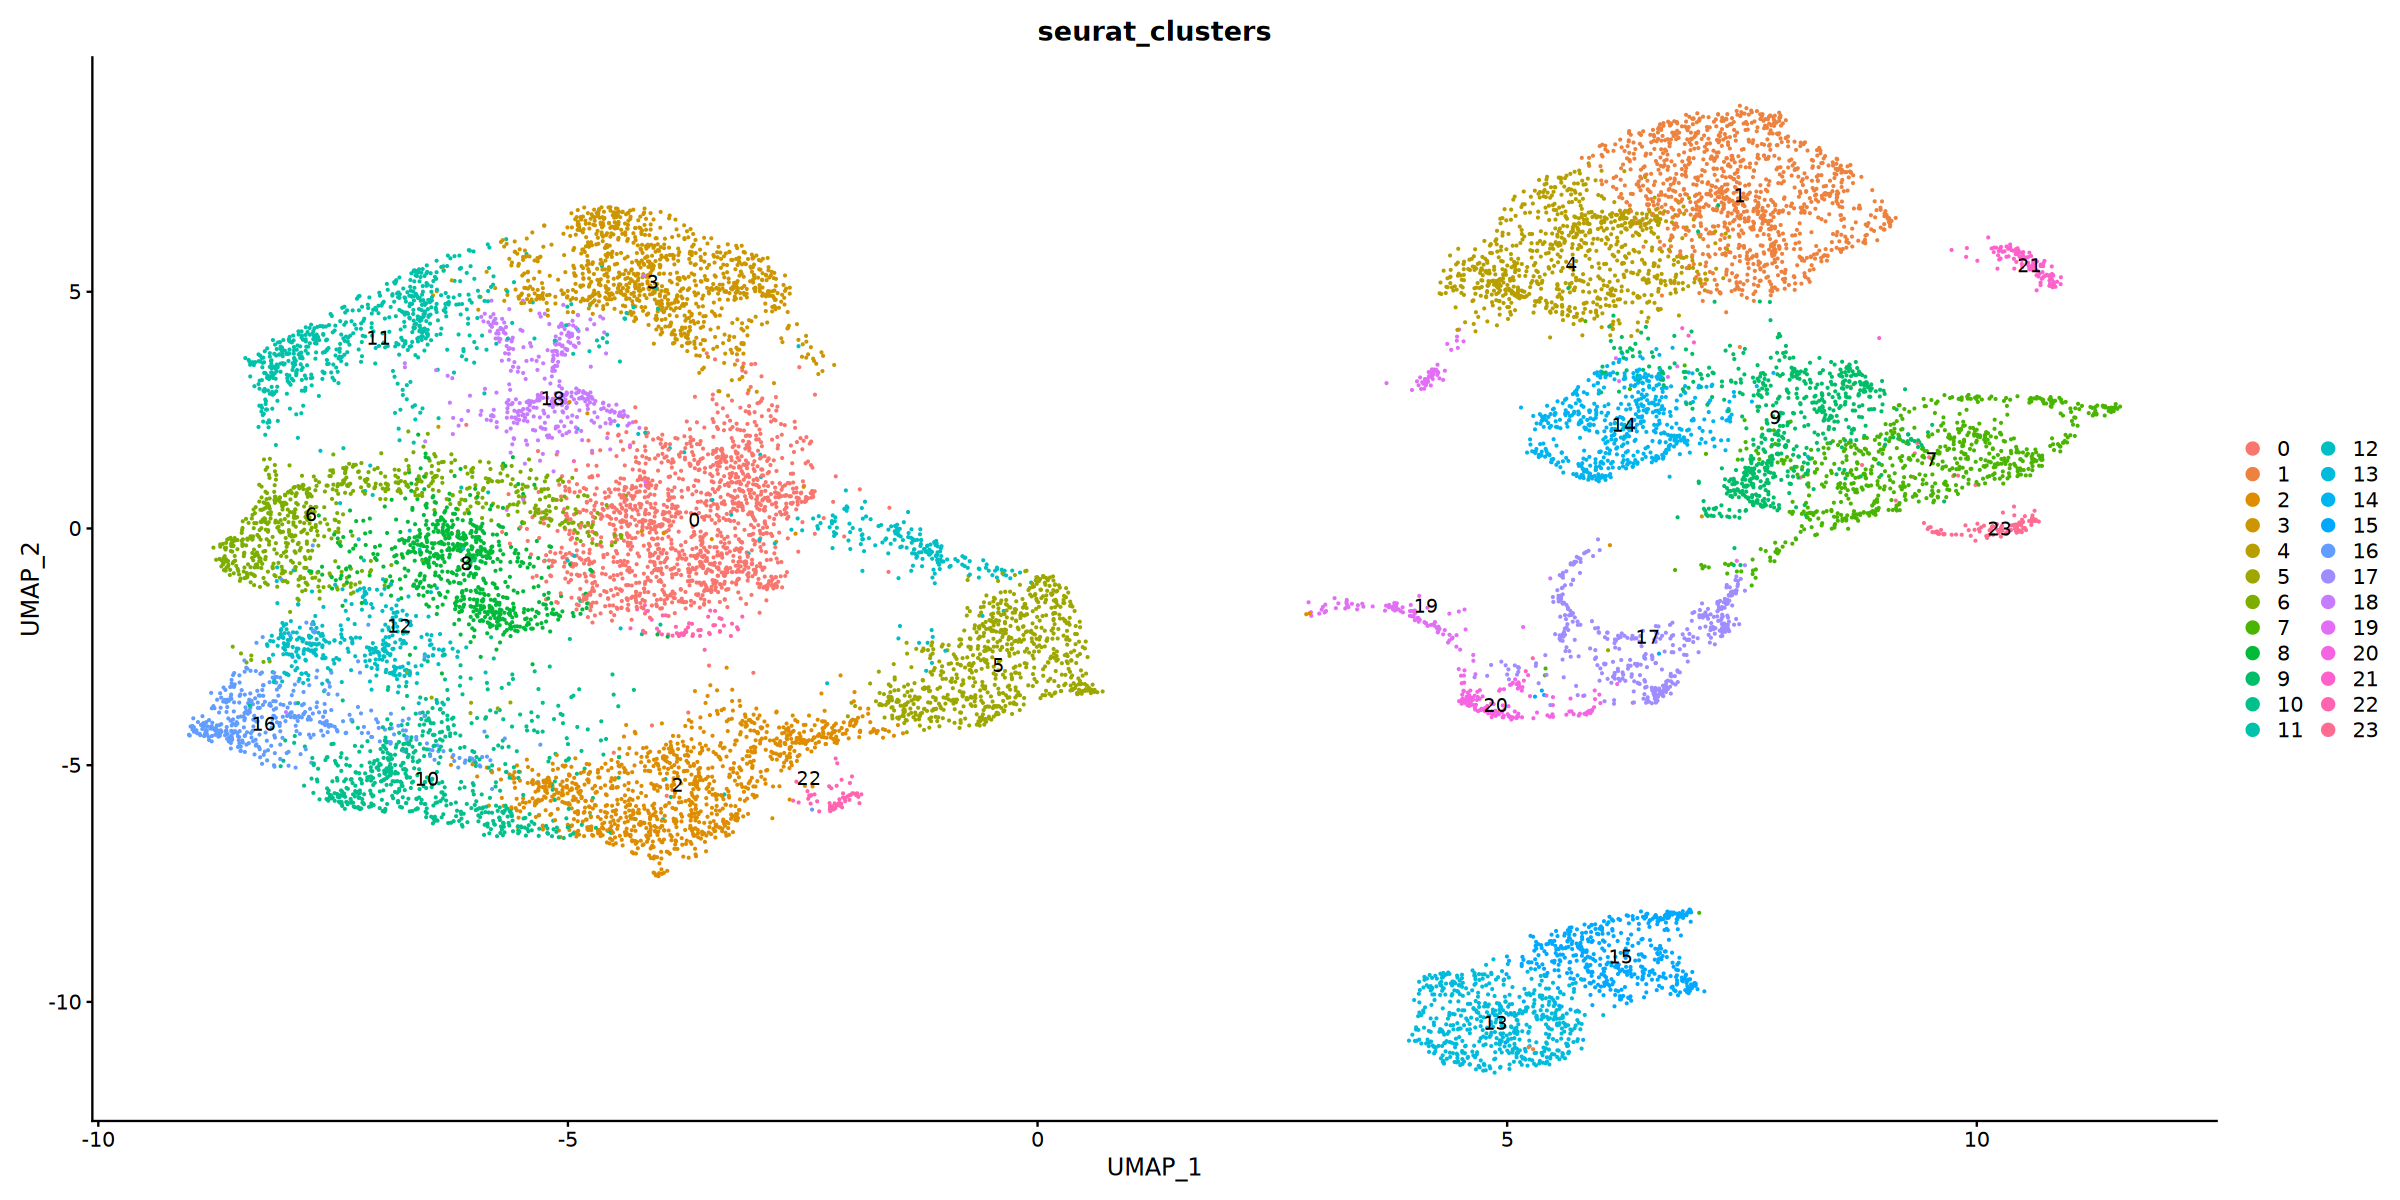

In [17]:
DimPlot(obj_ori, group.by = "seurat_clusters", label = TRUE)

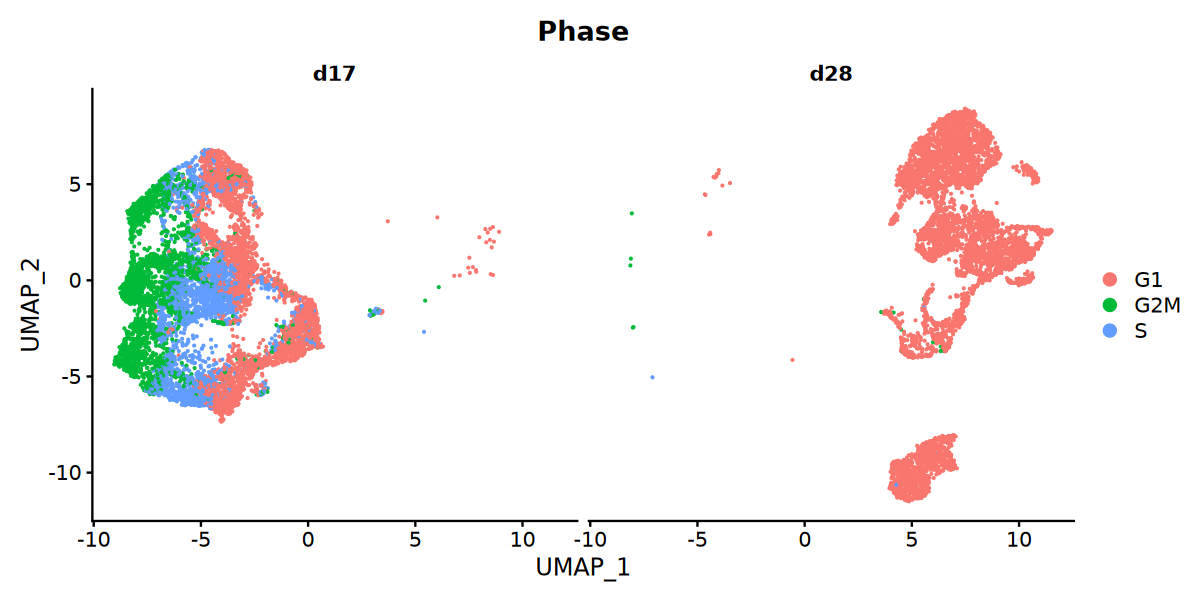

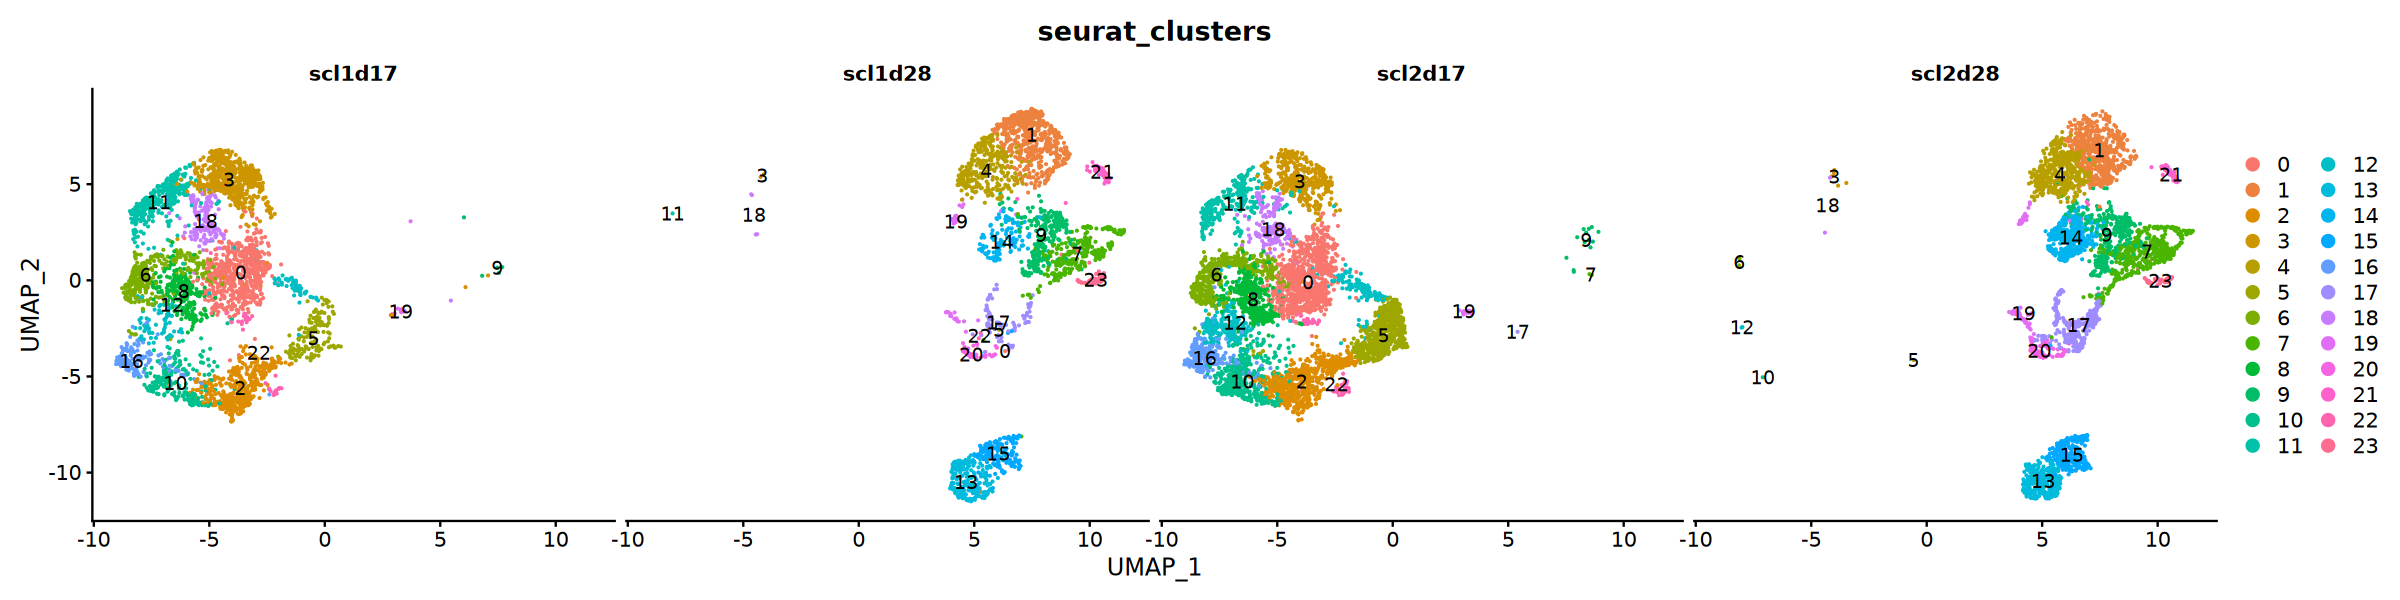

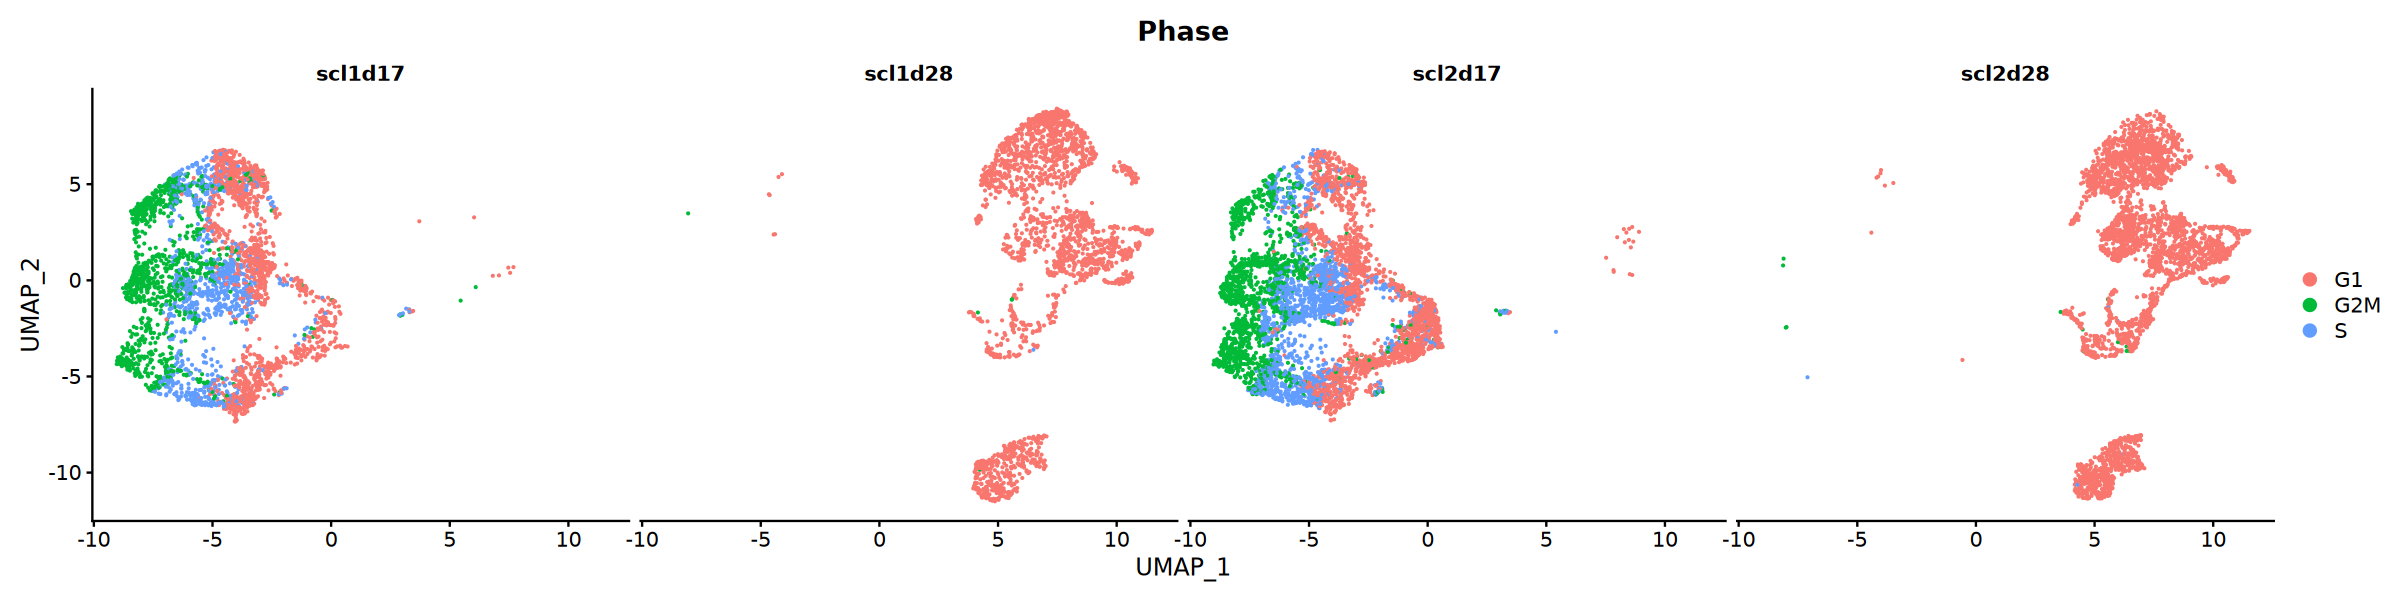

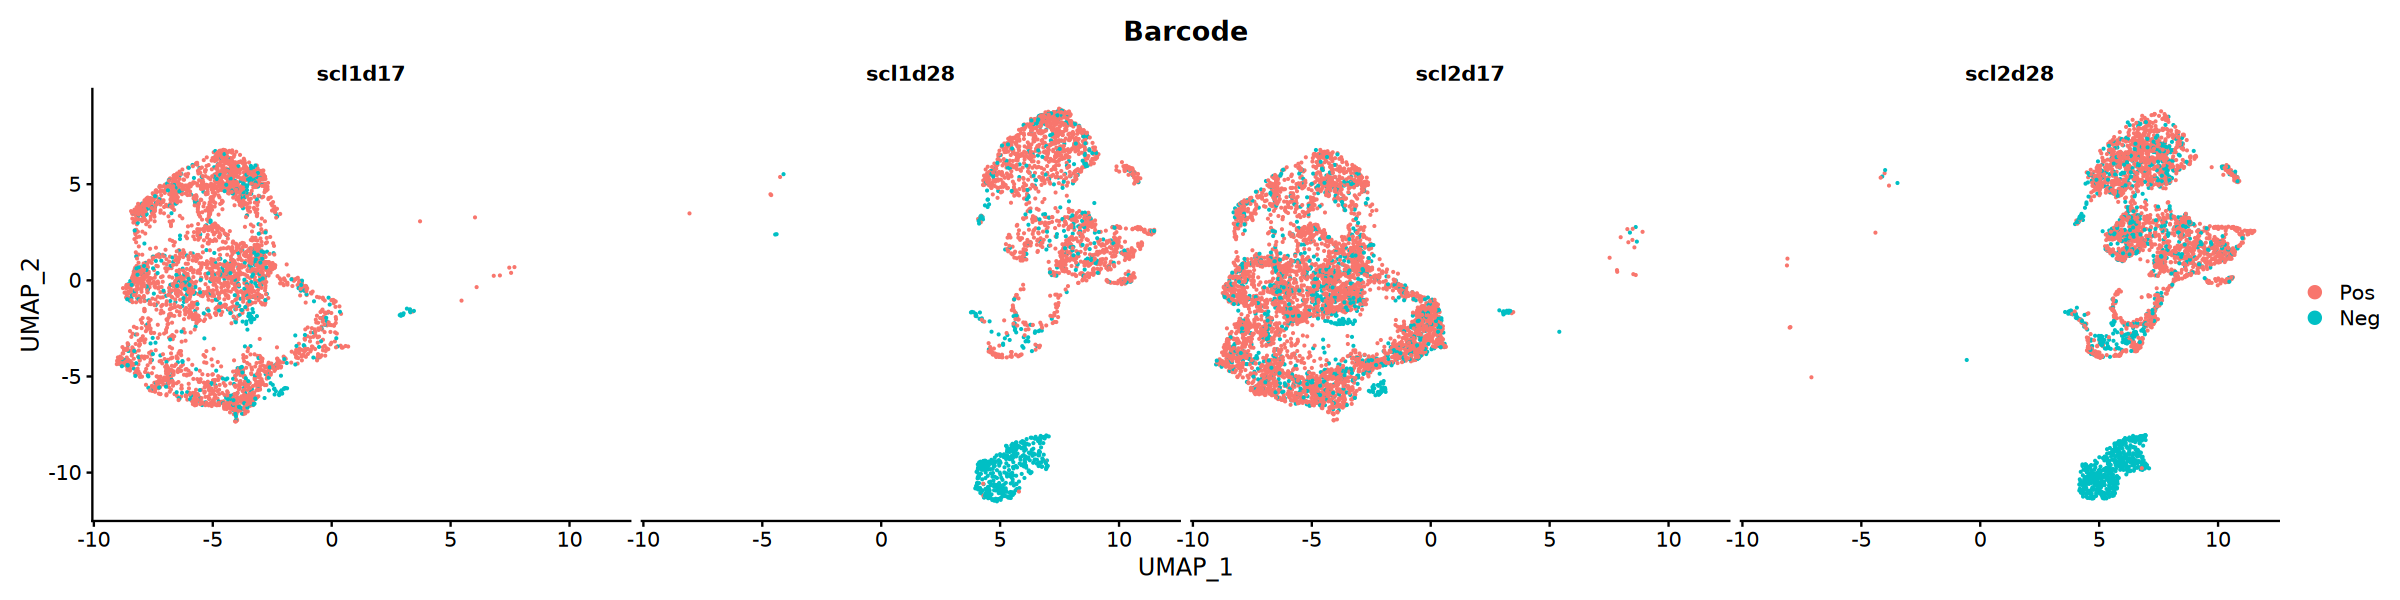

In [32]:
pdim(10,5)
DimPlot(obj_ori, group.by = "Phase", split.by = "diff_day")

pdim(20,5)
DimPlot(obj_ori, group.by = "seurat_clusters", split.by = "sample_ID", label = TRUE)
DimPlot(obj_ori, group.by = "Phase", split.by = "sample_ID")
DimPlot(obj_ori, group.by = "Barcode", split.by = "sample_ID")


for(i in c("seurat_clusters", "Phase", "Barcode")){
    svg(paste0(outdir, "2025_Emilia_EscTREX_revision_SuppFigure_UMAPs_",
               i, ".svg"),
       width = 20, height = 5)

    print(DimPlot(obj_ori, group.by = i, 
                  split.by = "sample_ID", label = TRUE)
         )
    dev.off()
}

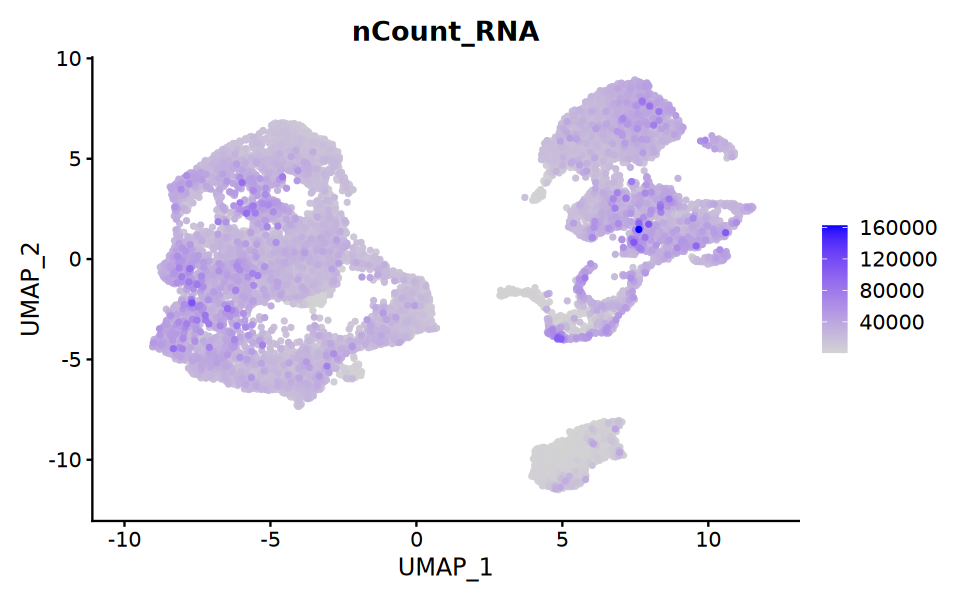

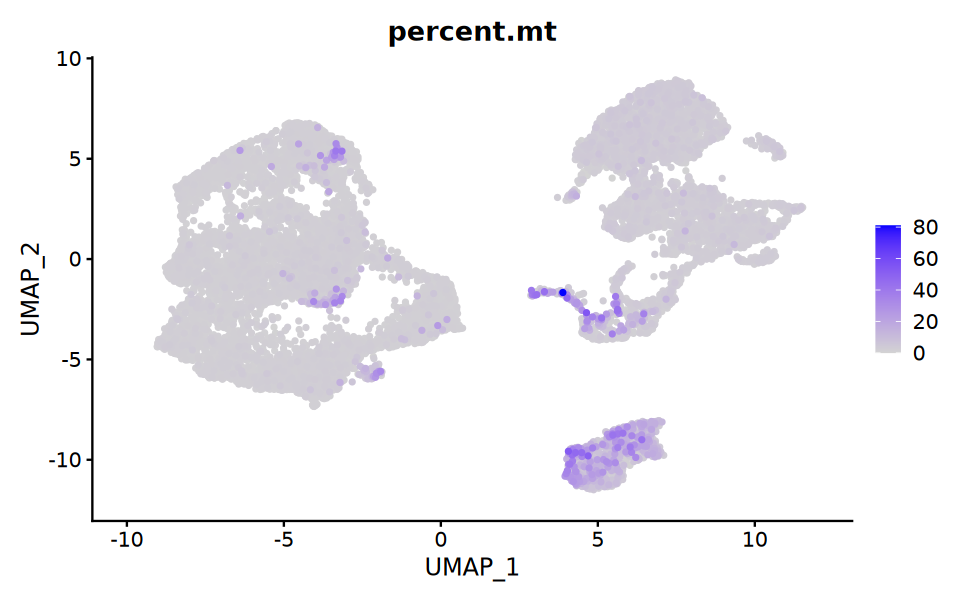

In [29]:
pdim(8,5)
FeaturePlot(obj_ori, feature = "nCount_RNA", pt.size = 1, order = TRUE)

FeaturePlot(obj_ori, feature = "percent.mt", pt.size = 1, order = TRUE)


for(i in c("nCount_RNA", "percent.mt")){
    png(paste0(outdir, "2025_Emilia_EscTREX_revision_SuppFigure_UMAPs_",
               i, ".png"),
       #width = 8, height = 5
       )

    print(FeaturePlot(obj_ori, feature = i, 
                  pt.size = 1, order = TRUE)
         )
    dev.off()
}

In [14]:
obj_clean

An object of class Seurat 
38607 features across 12985 samples within 1 assay 
Active assay: RNA (38607 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

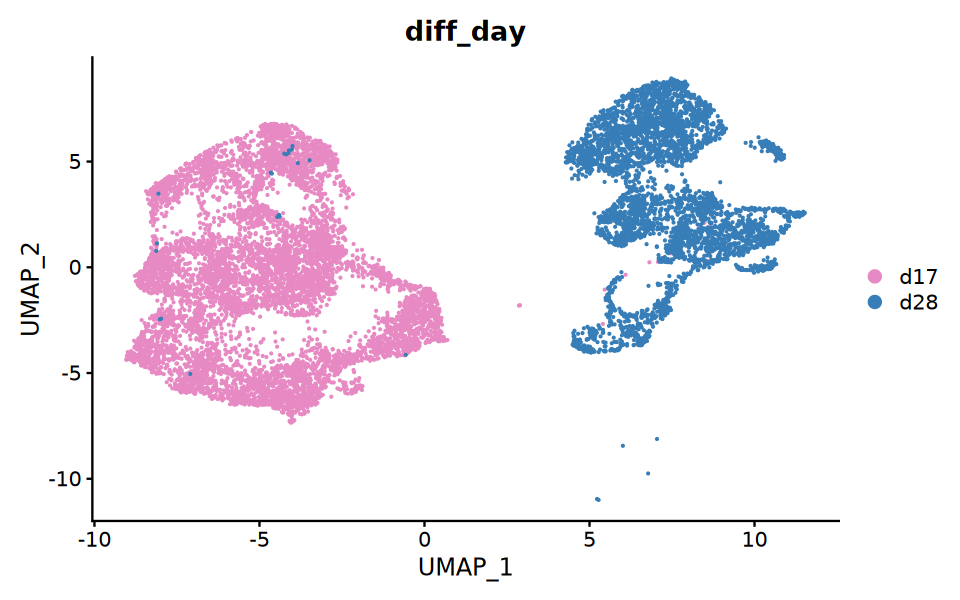

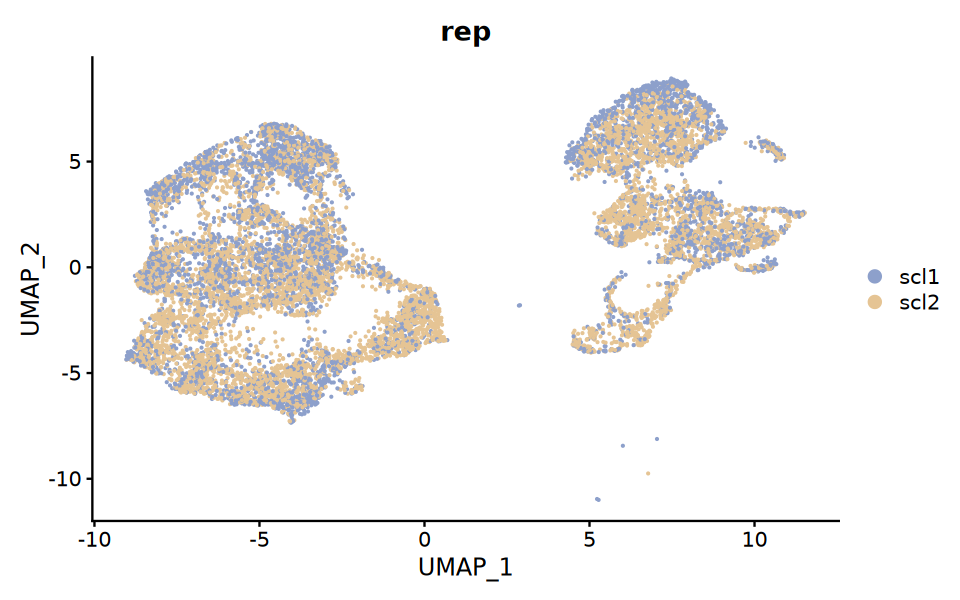

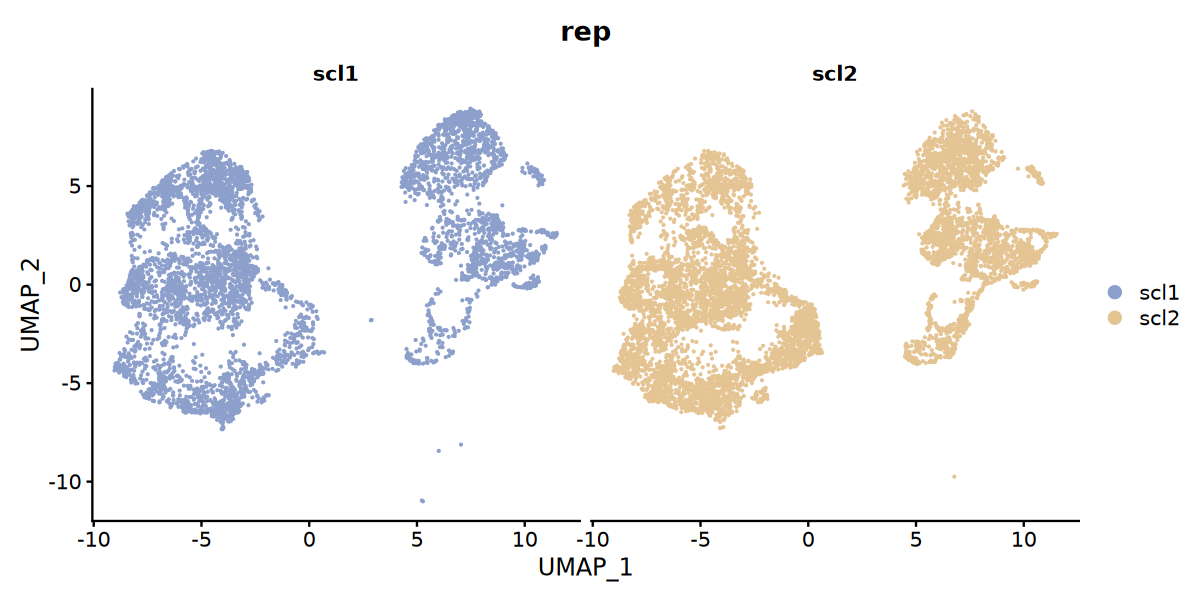

In [38]:
pdim(8,5)

DimPlot(obj_clean, group.by = "diff_day", 
        label =  FALSE,
        cols = c("#e78ac3","#377eb8"))

DimPlot(obj_clean, group.by = "rep", label =  FALSE, shuffle=TRUE,
        cols = c("#8da0cb", "#e5c494")
        )

pdim(10,5)
DimPlot(obj_clean, group.by = "rep", split.by = "rep",
        label =  FALSE, shuffle=TRUE,
        cols = c("#8da0cb", "#e5c494")
        )